In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Cleaned_data_tree.csv')
df.head()

,person_age,person_gender,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status,...,person_education_Master,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,previous_loan_defaults_on_file_Yes
0,22.0,0,71948.0,0,35000.0,16.02,0.49,3.0,561,1,...,1,0,0,1,0,0,0,1,0,0
1,21.0,0,12282.0,0,1000.0,11.14,0.08,2.0,504,0,...,0,0,1,0,1,0,0,0,0,1
2,25.0,0,12438.0,3,5500.0,12.87,0.44,3.0,635,1,...,0,0,0,0,0,0,1,0,0,0
3,23.0,0,79753.0,0,35000.0,15.23,0.44,2.0,675,1,...,0,0,0,1,0,0,1,0,0,0
4,24.0,1,66135.0,1,35000.0,14.27,0.53,4.0,586,1,...,1,0,0,1,0,0,1,0,0,0


In [3]:
X = df.drop('loan_status',axis=1)
y=df['loan_status']

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

# Modelling & Evaluation

In [5]:
from sklearn.ensemble import GradientBoostingClassifier

In [6]:
# Hyperparameter Tuning

from sklearn.model_selection import GridSearchCV

estimator = GradientBoostingClassifier(random_state=True)
param_grid = {'n_estimators': list(range(1,20)),
             'learning_rate':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]}
gb_grid = GridSearchCV(estimator, param_grid, scoring='accuracy', cv=5)
gb_grid.fit(X_train,y_train)

gb=gb_grid.best_estimator_
gb

GradientBoostingClassifier(learning_rate=0.9, n_estimators=19,
                           random_state=True)

In [7]:
gb_grid.best_params_

{'learning_rate': 0.9, 'n_estimators': 19}

In [8]:
# Important features

feats_ab = pd.DataFrame(data=gb.feature_importances_,
                       index=X.columns,
                       columns=['Importance'])

important_features_gb = feats_ab[feats_ab['Importance']>0].index.tolist()
important_features_gb

['person_age',
 'person_income',
 'person_emp_exp',
 'loan_amnt',
 'loan_int_rate',
 'loan_percent_income',
 'cb_person_cred_hist_length',
 'credit_score',
 'person_home_ownership_OTHER',
 'person_home_ownership_OWN',
 'person_home_ownership_RENT',
 'loan_intent_EDUCATION',
 'loan_intent_HOMEIMPROVEMENT',
 'loan_intent_MEDICAL',
 'loan_intent_PERSONAL',
 'loan_intent_VENTURE',
 'previous_loan_defaults_on_file_Yes']

Creating Gradient Classifier Model with important parameters and important features

In [9]:
# Selecting train & test data
X_train_gb = X_train[important_features_gb]
X_test_gb = X_test[important_features_gb]

# Modelling
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

model = gb_grid.best_estimator_
model.fit(X_train_gb, y_train)

#Predict train data
ypred_train = model.predict(X_train_gb)
print('Train Accuracy :', accuracy_score(y_train,ypred_train))

print('CV Score : ', cross_val_score(model, X_train,y_train, cv=5, scoring='accuracy').mean())

#Predict & Evaluation on test data
ypred_test = model.predict(X_test_gb)
print('Test Accuracy : ', accuracy_score(y_test, ypred_test))

Train Accuracy : 0.9316388888888889
CV Score :  0.9269166666666667
Test Accuracy :  0.9283333333333333


In [10]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,ypred_test))

from sklearn.metrics import classification_report
print(classification_report(y_test,ypred_test))

[[6773  217]
 [ 428 1582]]
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      6990
           1       0.88      0.79      0.83      2010

    accuracy                           0.93      9000
   macro avg       0.91      0.88      0.89      9000
weighted avg       0.93      0.93      0.93      9000



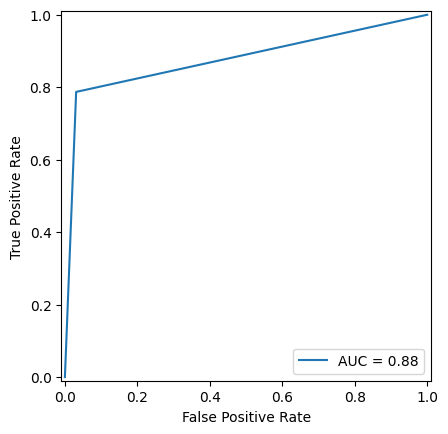

In [11]:
from sklearn.metrics import roc_curve,auc, RocCurveDisplay

fpr,tpr,thresholds = roc_curve(y_test,ypred_test)
roc_auc = auc(fpr, tpr)
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc).plot()
plt.show()

In [12]:
#AUC Score

from sklearn.metrics import roc_auc_score
print('AUC Score : ', roc_auc_score(y_test, ypred_test))

AUC Score :  0.8780101637734076
